# MobileNet

In [ ]:
#see how images are classified by Imagenet classifications

In [1]:
import numpy as np

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Activation, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications import imagenet_utils

from sklearn.metrics import confusion_matrix
import itertools
import os
import shutil
import random
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
#downloading an already built model
mobile = tf.keras.applications.mobilenet.MobileNet()

17227776/17225924 [==============================] - 1s 0us/step


In [12]:
def prepare_image(file):
    img_path = 'data/Mobile_Net-samples/'
    img = image.load_img(img_path + file, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array_expanded_dims = np.expand_dims(img_array, axis=0)
    return tf.keras.applications.mobilenet.preprocess_input(img_array_expanded_dims)

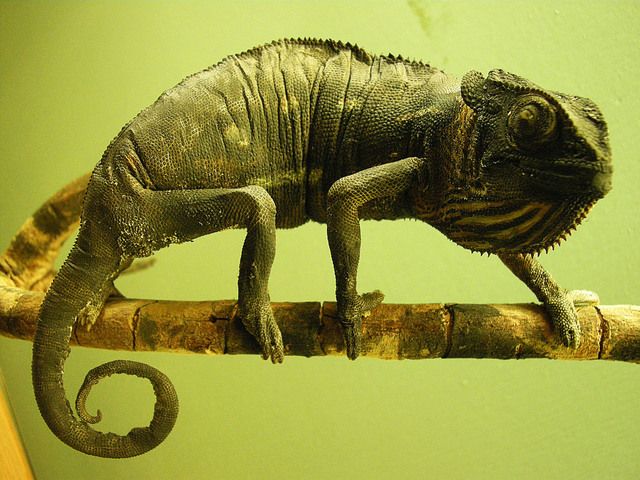

In [13]:
from IPython.display import Image
Image(filename='data/Mobile_Net-samples/1.jpg', width=640, height=480)

In [14]:
preprocessed_image = prepare_image('1.jpg')
predictions = mobile.predict(preprocessed_image)
results = imagenet_utils.decode_predictions(predictions)
results

[[('n01677366', 'common_iguana', 0.79280585),
  ('n01694178', 'African_chameleon', 0.16942628),
  ('n01704323', 'triceratops', 0.017390464),
  ('n01688243', 'frilled_lizard', 0.005163897),
  ('n03388043', 'fountain', 0.0028483823)]]

In [20]:
#Cool! ImageNet predicted that this is a common iguana

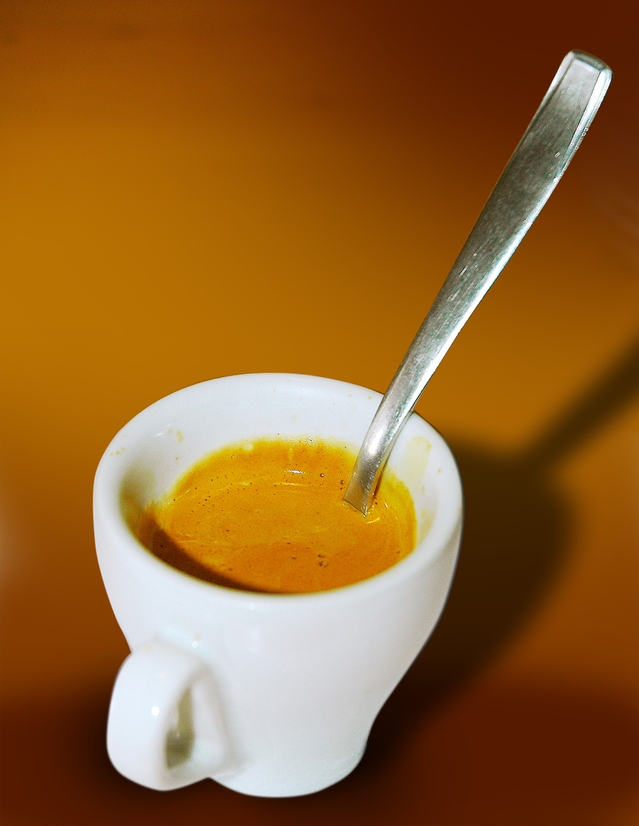

In [16]:
from IPython.display import Image
Image(filename='data/Mobile_Net-samples/2.jpg', width=639, height=826)

In [17]:
preprocessed_image = prepare_image('2.jpg')
predictions = mobile.predict(preprocessed_image)
results = imagenet_utils.decode_predictions(predictions)
results

[[('n04263257', 'soup_bowl', 0.6101353),
  ('n07920052', 'espresso', 0.34365013),
  ('n07584110', 'consomme', 0.019371927),
  ('n07930864', 'cup', 0.006372643),
  ('n03633091', 'ladle', 0.004035487)]]

In [18]:
# haha! The predicted it was a soup bowl when the #2 prediction was right